In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import random
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils

In [8]:
#Generating Random dataset...
X, Y = make_blobs(n_samples=1000, centers=2, 
                  random_state=0, cluster_std=0.40) 

In [9]:
df=pd.DataFrame(X,columns=['feature1','feature2'])


In [10]:
df.head(10)

,feature1,feature2
0,0.772409,4.128558
1,1.723293,3.912876
2,0.830248,3.587256
3,2.759774,1.199302
4,1.745549,0.789908
5,0.981163,4.931491
6,1.653538,0.498387
7,0.951620,4.260865
8,0.936889,4.038396
9,1.598507,0.373276


In [11]:
#Plotting of Data points

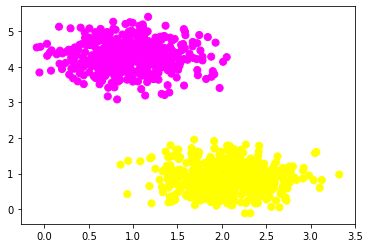

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 

In [13]:
df.to_csv('random.csv',index=False)

In [14]:
df1=pd.read_csv('random.csv')

In [15]:
df1.head(10)

,feature1,feature2
0,0.772409,4.128558
1,1.723293,3.912876
2,0.830248,3.587256
3,2.759774,1.199302
4,1.745549,0.789908
5,0.981163,4.931491
6,1.653538,0.498387
7,0.951620,4.260865
8,0.936889,4.038396
9,1.598507,0.373276


In [16]:
#Drawing a stright line to separate the 2 sets of data

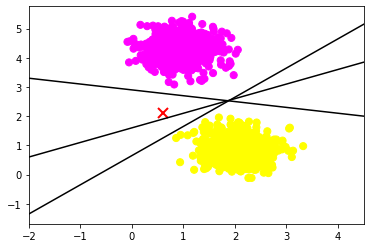

In [17]:
#Drawing a stright line to separate the 2 sets of data
xfit = np.linspace(-2,4.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='spring')

plt.plot([0.6],[2.1] , 'x' , color='red', markeredgewidth=2 , markersize=10)

for m,b in [(1,0.65) , (0.5 , 1.6) , (-0.2 , 2.9)]:

 plt.plot(xfit , m * xfit + b , '-k')

plt.xlim(-2, 4.5);

In [18]:
xfit = np.linspace(-2, 4.5) 

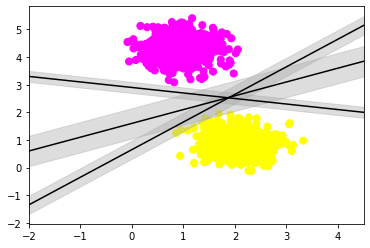

In [19]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='spring')
  
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  
    color='#AAAAAA', alpha=0.4) 
  
plt.xlim(-2, 4.5); 
plt.show() 

In [20]:
x=pd.read_csv('random.csv')

In [21]:
a=np.array(x)

In [22]:
y=a[:,1]

In [23]:
x = np.column_stack((x.feature1,x.feature2)) 
x.shape # 569 samples and 2 features 
  
print (x),(y) 

[[0.77240921 4.12855761]
 [1.72329327 3.91287618]
 [0.83024799 3.58725631]
 ...
 [2.06637237 0.72744677]
 [1.16253505 3.68928985]
 [1.17376679 4.25734575]]


(None,
 array([ 4.12855761,  3.91287618,  3.58725631,  1.19930193,  0.78990775,
         4.93149117,  0.49838697,  4.26086522,  4.03839601,  0.37327551,
         4.3815045 ,  1.08930175,  1.2504863 ,  0.47218542,  3.93867393,
         3.73578015,  0.81318127,  1.11045352,  0.69010358,  0.89437971,
         4.98225996,  3.51633745,  0.65673092,  4.51180357,  4.11137648,
         1.30325252,  3.74324841,  3.97321191,  4.18467098,  4.14959142,
         1.4205372 ,  0.79657939,  4.20861864,  4.51458901,  4.65075029,
         4.06961485,  4.34146425,  0.54327707,  4.45180968,  0.97825564,
         0.84463645,  3.97859013,  4.49637992,  0.24112422,  0.43485675,
         0.4771075 ,  0.24583022,  1.01826928,  3.61327429,  0.40141382,
         0.69749979,  0.50667771,  0.9932771 ,  4.50218771,  1.31269793,
         4.37929877,  4.41453609,  0.33543964,  0.52155557,  0.85446213,
         4.15586686,  4.43977332,  1.64140219,  4.23516879,  0.67526965,
         4.34231587,  0.76656169,  4.8229256

In [24]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[659 586 517 392 201 970  76 734 626  45 798 344 406  68 591 540 211 355
 154 256 976 513 137 864 650 422 542 605 693 672 448 205 703 866 908 635
 775  92 831 299 226 607 861  22  59  70  23 313 520  50 159  78 304 863
 424 795 814  39  87 232 677 827 484 719 148 777 183 948 425  99  67 825
 260 136 375 902 712 873 918 931 679 696 582 923 476 329 529 483 345 558
 128 955 741 761 901 163 898 480 968  46 580 350 629 929 899 627 604 372
 525 108 817 200 124 830 983 122 953 593 315 212  58 939 714 663 960  48
 829 297 994 736 471 702 772 548 281 437 161  71  11 652 554 655 455 493
 203 943 291 337 439 653 560 721 173 334 790 867 869 223  69 793 510 618
 528 893 426 113 926 630 449 620 730 228 139  27 669 167 905 875 824 940
 119 625 697 369 619 254 420  40 813 446 952 490 101 151 565 142 255 367
 215 638  51 386 675 944   1 250 206 170 547 689 561 886 832 271 834 927
 909  81 698 289 494 523 720 611 892 880 414 181 376 354   4 916 403 632
 292 735   9 252 759 155 343 888 674 460 938 770 10

In [25]:
#Fitting a SVM Model

clf = SVC(kernel='linear') 
  
# fitting 
clf.fit(x, training_scores_encoded) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
#SVM Decision Boundary Function

In [27]:
def SVM_Decision_Boundary(clf, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)
    

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [28]:
#plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='spring')
#SVM_Decision_Boundary(clf);

In [29]:
#Support Vectors Points

In [30]:
clf.support_vectors_

array([[ 2.26043426, -0.11883186],
       [ 2.32165438, -0.11615812],
       [ 2.64923776,  0.04810765],
       ...,
       [ 0.96196285,  5.25608547],
       [ 0.7751434 ,  5.2687688 ],
       [ 1.16871613,  5.40752937]])

In [31]:
# def plot_svm(N=10, ax=None):
#     X, y = make_blobs(n_samples=1000, centers=2,
#                       random_state=0, cluster_std=0.40)
#     X = X[:N]
#     y = y[:N]
#     clf = SVC(kernel='linear', C=1E10)
#     clf.fit(x, training_scores_encoded) 
    
#     ax = ax or plt.gca()
#     ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
#     ax.set_xlim(-1, 4)
#     ax.set_ylim(-1, 6)
#     SVM_Decision_Boundary(clf, ax)

# fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# for axi, N in zip(ax, [1000, 120]):
#     plot_svm(N, axi)
#     axi.set_title('N = {0}'.format(N))

In [32]:
# from ipywidgets import interact, fixed
# interact(plot_svm, N=[10, 200], ax=fixed(None));

In [33]:
df=pd.DataFrame(X,Y)

In [34]:
df1=df

In [36]:
#Dropping of Rows which are not Support Vectors and Store it into df2...

df2=df1.drop(df1.index == 'clf.support_vectors_')


In [37]:
#Storing the Support Vectors into df3

In [38]:
df3=df.drop(df.index != 'clf.support_vectors_')

In [39]:
# NO of Rows which are not Support Vectors
# 500 Rows

df2.count()

0    500
1    500
dtype: int64

In [40]:
# NO of Support Vectors points
# 500

df3.count()

0    500
1    500
dtype: int64

In [41]:
# Fitting a SVM model after removing some data points other than Support Vectors

In [42]:
clf = SVC(kernel='linear') 
  
# fitting 
clf.fit(x, training_scores_encoded) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# Below cell shows removing of data points other than Support Vectors does not affect Decision Boundary..

In [44]:
clf.support_vectors_

array([[ 2.26043426, -0.11883186],
       [ 2.32165438, -0.11615812],
       [ 2.64923776,  0.04810765],
       ...,
       [ 0.96196285,  5.25608547],
       [ 0.7751434 ,  5.2687688 ],
       [ 1.16871613,  5.40752937]])

In [50]:
# Thank You